# Get Monthly Usage Info per Site

### Load Libraries, Configuration

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Read in Data from PowerGen
- Merge into 1 file for each datatype
- Rexport

In [72]:
df_0110_use = pd.read_csv('data/pg/consumption/Elewa_Site_Charts_Usage_Monthly_01-10.csv')
df_0110_cust = pd.read_csv('data/pg/consumption/Elewa_Site_Charts_Customers_Monthly_01-10.csv')
df_0110_rev = pd.read_csv('data/pg/consumption/Elewa_Site_Charts_Revenue_Monthly_01-10.csv')
df_0110_tx = pd.read_csv('data/pg/consumption/Elewa_Site_Charts_Transactions_Monthly_01-10.csv')

df_1120_use = pd.read_csv('data/pg/consumption/Elewa_Site_Charts_Usage_Monthly_11-20.csv')
df_1120_cust = pd.read_csv('data/pg/consumption/Elewa_Site_Charts_Customers_Monthly_11-20.csv')
df_1120_rev = pd.read_csv('data/pg/consumption/Elewa_Site_Charts_Revenue_Monthly_11-20.csv')
df_1120_tx = pd.read_csv('data/pg/consumption/Elewa_Site_Charts_Transactions_Monthly_11-20.csv')

df_2130_use = pd.read_csv('data/pg/consumption/Elewa_Site_Charts_Usage_Monthly_21-30.csv')
df_2130_cust = pd.read_csv('data/pg/consumption/Elewa_Site_Charts_Customers_Monthly_21-30.csv')
df_2130_rev = pd.read_csv('data/pg/consumption/Elewa_Site_Charts_Revenue_Monthly_21-30.csv')
df_2130_tx = pd.read_csv('data/pg/consumption/Elewa_Site_Charts_Transactions_Monthly_21-30.csv')

df_3140_use = pd.read_csv('data/pg/consumption/Elewa_Site_Charts_Usage_Monthly_31-40.csv')
df_3140_cust = pd.read_csv('data/pg/consumption/Elewa_Site_Charts_Customers_Monthly_31-40.csv')
df_3140_rev = pd.read_csv('data/pg/consumption/Elewa_Site_Charts_Revenue_Monthly_31-40.csv')
df_3140_tx = pd.read_csv('data/pg/consumption/Elewa_Site_Charts_Transactions_Monthly_31-40.csv')

df_41_use = pd.read_csv('data/pg/consumption/Elewa_Site_Charts_Usage_Monthly_41.csv')
df_41_cust = pd.read_csv('data/pg/consumption/Elewa_Site_Charts_Customers_Monthly_41.csv')
df_41_rev = pd.read_csv('data/pg/consumption/Elewa_Site_Charts_Revenue_Monthly_41.csv')
df_41_tx = pd.read_csv('data/pg/consumption/Elewa_Site_Charts_Transactions_Monthly_41.csv')

df_0110_use

,Year Month,Site,Total Consumption
0,Jul 2019,Sahn,NaN
1,Jul 2019,Sahn,NaN
2,Jul 2019,Sahn,NaN
3,Jul 2019,Sahn,NaN
4,Jul 2019,Sahn,NaN
...,...,...,...
11372,Dec 2023,Tihun,89.433
11373,Dec 2023,Pendembu,160.355
11374,Dec 2023,Sandaru,37.559
11375,Dec 2023,Tikonko,56.446


In [73]:
# group dfs by Year Month and Site
df_0110_use = df_0110_use.groupby(['Year Month', 'Site']).sum().reset_index() # total usage
df_0110_cust = df_0110_cust.groupby(['Year Month', 'Site']).mean().reset_index() # average num customers
df_0110_rev = df_0110_rev.groupby(['Year Month', 'Site']).sum().reset_index() # total revenue
df_0110_tx = df_0110_tx.groupby(['Year Month', 'Site']).sum().reset_index() # total transactions

df_1120_use = df_1120_use.groupby(['Year Month', 'Site']).sum().reset_index() # total usage
df_1120_cust = df_1120_cust.groupby(['Year Month', 'Site']).mean().reset_index() # average num customers
df_1120_rev = df_1120_rev.groupby(['Year Month', 'Site']).sum().reset_index() # total revenue
df_1120_tx = df_1120_tx.groupby(['Year Month', 'Site']).sum().reset_index() # total transactions

df_2130_use = df_2130_use.groupby(['Year Month', 'Site']).sum().reset_index() # total usage
df_2130_cust = df_2130_cust.groupby(['Year Month', 'Site']).mean().reset_index() # average num customers
df_2130_rev = df_2130_rev.groupby(['Year Month', 'Site']).sum().reset_index() # total revenue
df_2130_tx = df_2130_tx.groupby(['Year Month', 'Site']).sum().reset_index() # total transactions

df_3140_use = df_3140_use.groupby(['Year Month', 'Site']).sum().reset_index() # total usage
df_3140_cust = df_3140_cust.groupby(['Year Month', 'Site']).mean().reset_index() # average num customers
df_3140_rev = df_3140_rev.groupby(['Year Month', 'Site']).sum().reset_index() # total revenue
df_3140_tx = df_3140_tx.groupby(['Year Month', 'Site']).sum().reset_index() # total transactions

df_41_use = df_41_use.groupby(['Year Month', 'Site']).sum().reset_index() # total usage
df_41_cust = df_41_cust.groupby(['Year Month', 'Site']).mean().reset_index() # average num customers
df_41_rev = df_41_rev.groupby(['Year Month', 'Site']).sum().reset_index() # total revenue
df_41_tx = df_41_tx.groupby(['Year Month', 'Site']).sum().reset_index() # total transactions

df_0110_use

,Year Month,Site,Total Consumption
0,Apr 2020,Sahn,0.000000
1,Apr 2020,Tikonko,0.000000
2,Apr 2020,Tombodu,1151.272633
3,Apr 2021,Njagbwema,688.716000
4,Apr 2021,Sahn,0.000000
...,...,...,...
374,Sep 2023,Sulima,2514.639000
375,Sep 2023,Sumbuya,1770.816000
376,Sep 2023,Tihun,1736.326000
377,Sep 2023,Tikonko,2117.611000


In [74]:
# join the dataframes matching on Year Month and Site
df_0110 = df_0110_use.merge(
    df_0110_cust, on=['Year Month', 'Site']
).merge(
    df_0110_rev, on=['Year Month', 'Site']
).merge(
    df_0110_tx, on=['Year Month', 'Site']
)

df_1120 = df_1120_use.merge(
    df_1120_cust, on=['Year Month', 'Site']
).merge(
    df_1120_rev, on=['Year Month', 'Site']
).merge(
    df_1120_tx, on=['Year Month', 'Site']
)

df_2130 = df_2130_use.merge(
    df_2130_cust, on=['Year Month', 'Site']
).merge(
    df_2130_rev, on=['Year Month', 'Site']
).merge(
    df_2130_tx, on=['Year Month', 'Site']
)

df_3140 = df_3140_use.merge(
    df_3140_cust, on=['Year Month', 'Site']
).merge(
    df_3140_rev, on=['Year Month', 'Site']
).merge(
    df_3140_tx, on=['Year Month', 'Site']
)

df_41 = df_41_use.merge(
    df_41_cust, on=['Year Month', 'Site']
).merge(
    df_41_rev, on=['Year Month', 'Site']
).merge(
    df_41_tx, on=['Year Month', 'Site']
)

# remove the variables no longer needed
del df_0110_use, df_0110_cust, df_0110_rev, df_0110_tx
del df_1120_use, df_1120_cust, df_1120_rev, df_1120_tx
del df_2130_use, df_2130_cust, df_2130_rev, df_2130_tx
del df_3140_use, df_3140_cust, df_3140_rev, df_3140_tx
del df_41_use, df_41_cust, df_41_rev, df_41_tx

df_0110

,Year Month,Site,Total Consumption,# Customers,Total Revenue,Total Transactions
0,Apr 2020,Sahn,0.000000,500.000000,0.000000,0.0
1,Apr 2020,Tikonko,0.000000,262.000000,0.000000,0.0
2,Apr 2020,Tombodu,1151.272633,189.933333,843.798380,802.0
3,Apr 2021,Njagbwema,688.716000,150.000000,575.819971,744.0
4,Apr 2021,Sahn,0.000000,500.000000,0.000000,0.0
...,...,...,...,...,...,...
374,Sep 2023,Sulima,2514.639000,270.000000,500.151900,481.0
375,Sep 2023,Sumbuya,1770.816000,355.000000,772.455705,615.0
376,Sep 2023,Tihun,1736.326000,167.000000,369.974676,513.0
377,Sep 2023,Tikonko,2117.611000,266.000000,710.278474,533.0


In [75]:
# merge all the dataframe by stacking the rows
df = pd.concat([df_0110, df_1120, df_2130, df_3140, df_41], axis=0)

del df_0110, df_1120, df_2130, df_3140, df_41

In [76]:
# write to csv
df.to_csv('data/pg/consumption/monthly_site_data.csv', index=False)

### Clean Data

In [77]:
# import site data
df = pd.read_csv('data/pg/consumption/monthly_site_data.csv')

# inspect column types
df.dtypes

# convert Year Month to datetime given the format "Apr 2020"
df['Year Month'] = pd.to_datetime(df['Year Month'], format='%b %Y')

# sort by year month
df = df.sort_values('Year Month')

# remove any rows that have 0 for all three columns total consumption, revenue, AND transactions
df = df.loc[(df[['Total Consumption', 'Total Revenue', 'Total Transactions']] != 0).any(axis=1)]

df

# rexport
df.to_csv('data/pg/consumption/monthly_site_data_clean.csv', index=False)

### Visualize the Data

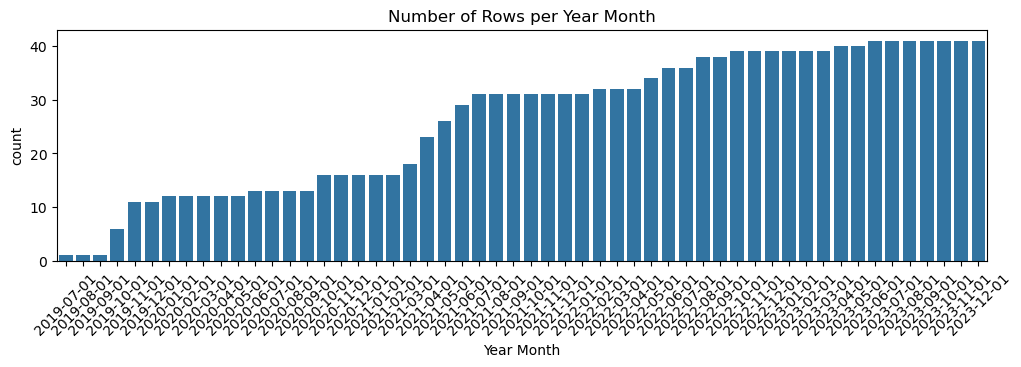

In [82]:
# read in pg data
df = pd.read_csv('data/pg/consumption/monthly_site_data_clean.csv')

# plot the number of rows per year month over time
plt.figure(figsize=(12, 3))
sns.countplot(data=df, x='Year Month')
plt.xticks(rotation=45)
plt.title('Number of Rows per Year Month')
plt.show()


In [ ]:
# read in pop estimate data
df_pop = pd.read_csv('data/pg/population/population_estimates.csv')